In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *  
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,7)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
df = pd.read_csv('../input/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


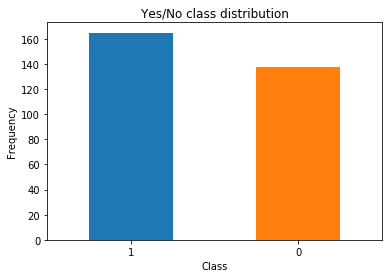

In [5]:
LABELS = ["1", "0"]
count_classes = pd.value_counts(df['target'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Yes/No class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [6]:
female=df[df['sex']== 0]
male=df[df['sex']== 1]

In [7]:
male_cp0=male[male['cp'] == 0]
male_cp1=male[male['cp'] == 1]
male_cp2=male[male['cp'] == 2]
male_cp3=male[male['cp'] == 3]

female_cp0=female[female['cp'] == 0]
female_cp1=female[female['cp'] == 1]
female_cp2=female[female['cp'] == 2]
female_cp3=female[female['cp'] == 3]


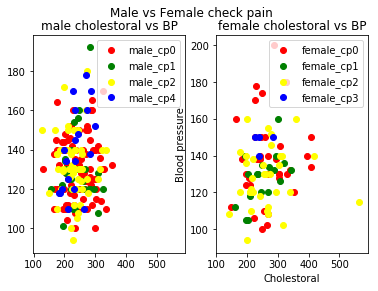

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
f.suptitle('Male vs Female check pain  ') 

ax1.set_title("male cholestoral vs BP")
ax1.scatter(male_cp0.chol,male_cp0.trestbps,color='red')
ax1.scatter(male_cp1.chol,male_cp1.trestbps,color='green')
ax1.scatter(male_cp2.chol,male_cp2.trestbps,color='yellow')
ax1.scatter(male_cp3.chol,male_cp3.trestbps,color='blue')
ax1.legend(['male_cp0','male_cp1','male_cp2','male_cp4'])


ax2.set_title("female cholestoral vs BP")
ax2.scatter(female_cp0.chol,female_cp0.trestbps,color='red')
ax2.scatter(female_cp1.chol,female_cp1.trestbps,color='green')
ax2.scatter(female_cp2.chol,female_cp2.trestbps,color='yellow')
ax2.scatter(female_cp3.chol,female_cp3.trestbps,color='blue')
ax2.legend(['female_cp0','female_cp1','female_cp2','female_cp3'])

plt.xlabel("Cholestoral")
plt.ylabel("Blood pressure")

plt.show();

In [9]:
def plot_confusion_matrix(y, pred, labels, classes, normalize=False, cmap=plt.cm.Blues):
    """
    Plots the confusion matrix.
    Args:
        y: Data Labels
        pred: Predicted outputs
        labels: A list of label values to calculate confusion matrix
        classes: A list of containing unique class names for plotting
        normalize:Wheter to plot data with int or percentage values. Default is int.
        cmap: Color map pf the plot
    
    """
    cm = confusion_matrix(y, pred, labels=labels)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
def best_model(model, train, test, grid_params):
    """
    Takes a model and grid params as an input and finds the best model.
    
    Args:
        model: A model class
        train: A dict containing train features as X and labels as y
        test: A dict containing test features as X and labels as y
        grid_params: GridSearchCV parameters
        
    Returns:
        best_estimator, table and best_params
    """
    
    grid = GridSearchCV(model, grid_params, cv=4, scoring='f1_weighted', 
                        n_jobs=-1, return_train_score=True).fit(train['X'], train['y'])
    estimator = grid.best_estimator_
    table = pd.DataFrame(grid.cv_results_).loc[:, 
                ['params', 'mean_test_score', 'std_test_score','mean_train_score', 
                 'std_train_score']].sort_values(by='mean_test_score', ascending=False)
    
    params = grid.best_params_
    preds = estimator.predict(test['X'])
    plot_confusion_matrix(test['y'], preds, labels=[1, 0], classes=['target=1','target=0'])
    print(classification_report(test['y'], preds))
    
    return estimator, table, params

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.88      0.90      0.89        31

   micro avg       0.89      0.89      0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61



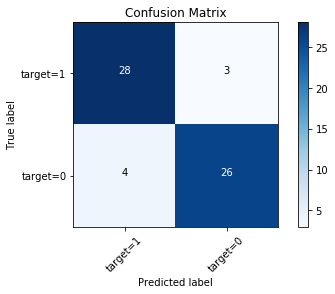

In [12]:
est, table, params = best_model(lr, train={'X': x_train, 'y': y_train},
                                test={'X': x_test, 'y':y_test},
                                grid_params=[{'solver':['liblinear', 'sag', 'newton-cg', 'lbfgs'],
                                              'C': [0.01, 0.05, 0.1, 0.5, 1, 5]}])


In [13]:
print("Best Estimator : ",est)
print("Best Parameters : " ,params)
print("Accuracy : ",jaccard_similarity_score(y_test, est.predict(x_test)))

Best Estimator :  LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
Best Parameters :  {'C': 5, 'solver': 'liblinear'}
Accuracy :  0.8852459016393442


In [14]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = est, X = x_train, y = y_train, cv = 10)
print('accuracy_mean {0} accuracy_std {1}'.format(accuracies.mean(),accuracies.std()))

accuracy_mean 0.8097173913043478 accuracy_std 0.08710988559062538


In [15]:
from sklearn.svm import SVC
sv = SVC(gamma='scale')

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.85      0.94      0.89        31

   micro avg       0.89      0.89      0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



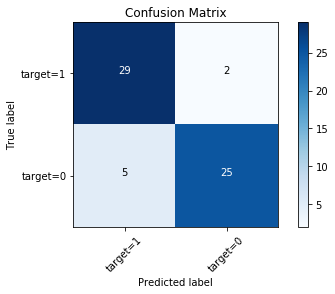

In [16]:
est, table, params = best_model(sv, train={'X': x_train, 'y': y_train},
                                test={'X': x_test, 'y':y_test},
                                grid_params=[{'kernel':['linear', 'rbf'],
                                              'C': [1, 3, 5, 7, 10, 20]}])

In [17]:
print("Best Estimator : ",est)
print("Best Parameters : " ,params)
print("Accuracy : ",jaccard_similarity_score(y_test, est.predict(x_test)))

Best Estimator :  SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best Parameters :  {'C': 20, 'kernel': 'linear'}
Accuracy :  0.8852459016393442


In [18]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = est, X = x_train, y = y_train, cv = 10)
print('accuracy_mean {0} accuracy_std {1}'.format(accuracies.mean(),accuracies.std()))

accuracy_mean 0.7852173913043478 accuracy_std 0.09342186817140835
